# SetUp

In [1]:
# LOAD LIBRARIES
suppressPackageStartupMessages(library(tictoc))
tic("LIBRARIES")
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(future))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(presto))
suppressPackageStartupMessages(library(cowplot))

suppressPackageStartupMessages(library(enrichR))
suppressPackageStartupMessages(library(org.Hs.eg.db))
suppressPackageStartupMessages(library(AnnotationDbi))

suppressPackageStartupMessages(library(SingleR))

suppressPackageStartupMessages(library(GPTCelltype))
suppressPackageStartupMessages(library(openai))
toc()

LIBRARIES: 6.957 sec elapsed


In [2]:
total_time <- function(seconds) {
    d <- seconds %/% (86400)
    h <- (seconds %% 86400) %/% 3600
    m <- (seconds %% 3600) %/% 60
    s <- seconds %% 60
    
    cat(sprintf("Total Time: %f Days, %f Hours, %f Minutes and %f Seconds\n", d, h, m, s))
}

# Note

* Subcluster di neuroni e simili
* Mesi: 1, 2, 3
* Geni:
    * SRCIN1
    * SATB2 (manca nel KO di p140)

# Name

In [3]:
timepoints = c("1month", "2month", "3month")
genes_of_interest = c("SRCIN1", "SATB2")
path_to_data = "/sharedFolder/Data/"
res = c(1, 0.5)
n_dim = c(1:20)

In [4]:
timepoint <- timepoints[3]

# Clustering

In [82]:
12396+ 12379 +11536 + 8944  +7661  +5851 + 3677 + 3534 + 3344 ==nrow(filtered_obj@meta.data)

[1] TRUE

In [84]:
table(Idents(filtered_obj))
nrow(filtered_obj@meta.data)
nrow(filtered_obj@meta.data)/nrow(sc_data@meta.data) *100


    0     1     2     3     6    14    18    20    21 
12396 12379 11536  8944  7661  5851  3677  3534  3344 

[1] 69322

[1] 43.45308

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



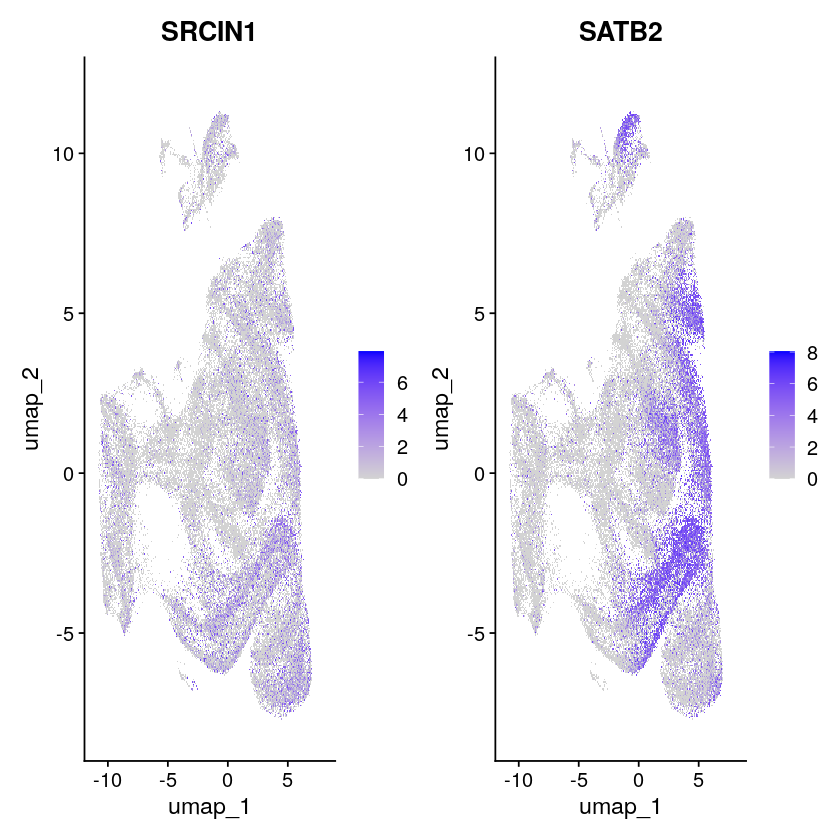

In [56]:
FeaturePlot(sc_data, c(genes_of_interest))

In [57]:
tic()
ggsave(
    filename = "plot.png",
    plot = FeaturePlot(sc_data, c(genes_of_interest)),
    ,  width = 1920, height = 1080, units = "px"
)
toc()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



1.549 sec elapsed


In [58]:
toc()

1115.271 sec elapsed


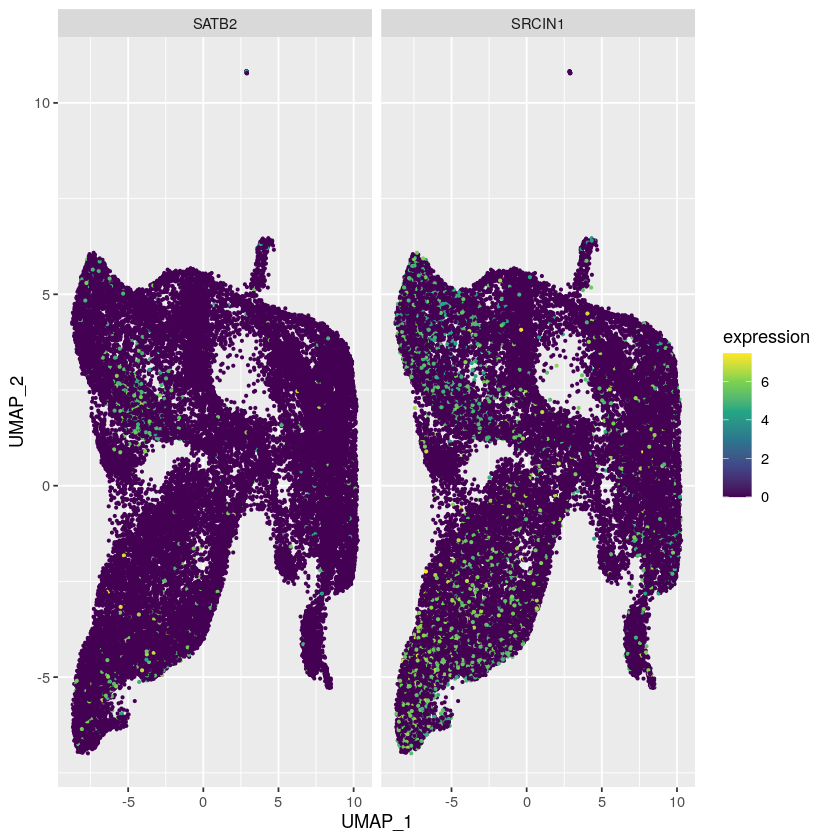

In [25]:
# Get UMAP coordinates
umap <- Embeddings(sc_data, reduction = "umap")

# Get expression values for your genes
expr <- FetchData(sc_data, vars = genes_of_interest)

# Combine them into one data frame
expr$UMAP_1 <- umap[,1]
expr$UMAP_2 <- umap[,2]

# Reshape for ggplot
library(tidyr)

expr_long <- pivot_longer(expr, all_of(genes_of_interest),
                          names_to = "gene", values_to = "expression")

# Plot with shared scale
ggplot(expr_long, aes(UMAP_1, UMAP_2, color = expression)) +
  geom_point(size = 0.5) +
  scale_color_viridis_c() +
  facet_wrap(~gene)   # if you still want facets, but on the same scale

# Cell Annotation

## signac

In [26]:
library(signac)

ERROR: Error in library(signac): there is no package called ‘signac’


## SingeR

In [2]:
library(SingleR)

In [ ]:
BiocManager::install("zellkonverter")
library(zellkonverter)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



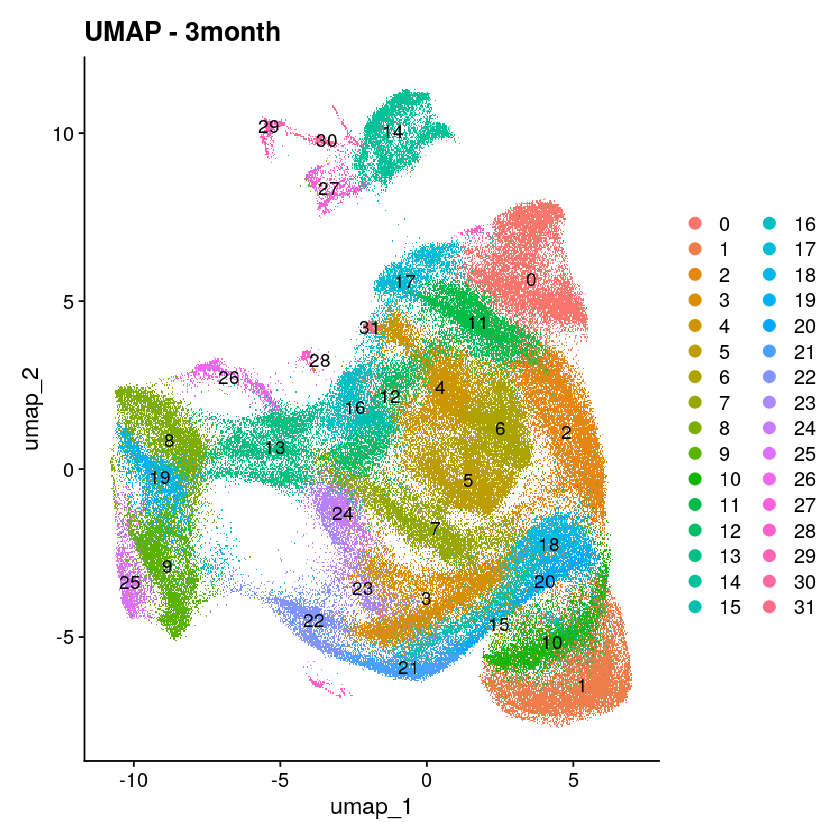

In [116]:
DimPlot(sc_data, reduction = "umap", label = TRUE, pt.size = 1) + 
            ggtitle(paste("UMAP -",timepoint))

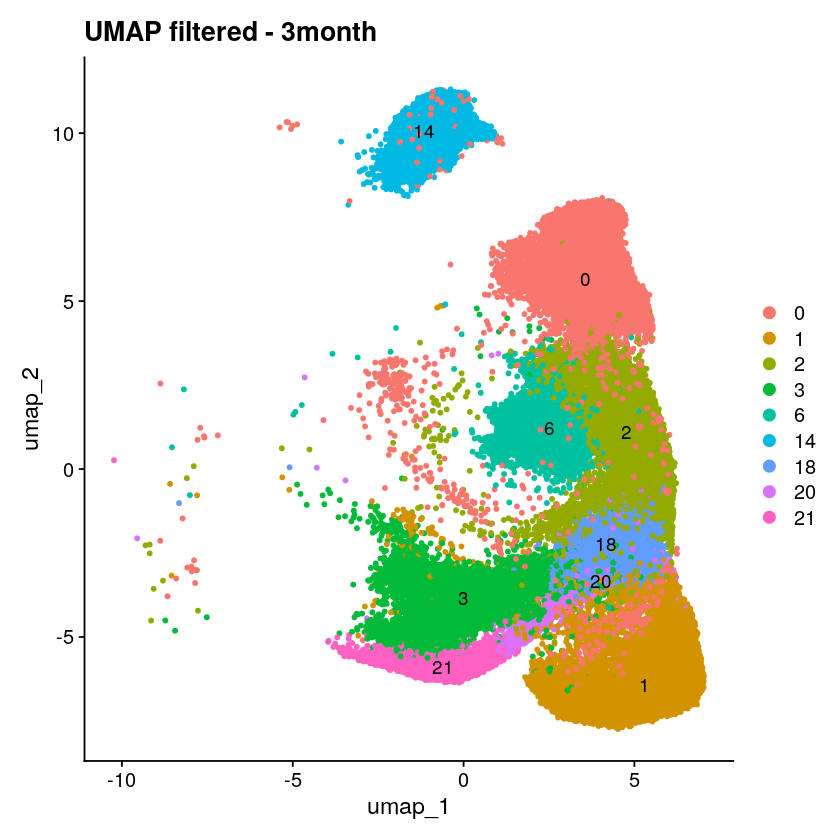

In [118]:
DimPlot(filtered_obj, reduction = "umap", label = TRUE, pt.size = 1) + 
            ggtitle(paste("UMAP filtered -",timepoint))

### HumanPrimaryCellAtlasData

In [6]:
ref <- celldex::HumanPrimaryCellAtlasData()

ERROR: [1m[33mError[39m in `collect()`:[22m
[1m[22m[33m![39m Failed to collect lazy table.
[1mCaused by error in `db_collect()`:[22m
[1m[22m[33m![39m Arguments in `...` must be used.
[31m✖[39m Problematic argument:
[36m•[39m ..1 = Inf
[36mℹ[39m Did you misspell an argument name?


In [129]:
summary(ref)

ERROR: Error in object[[i]]: object of type 'closure' is not subsettable


In [ ]:
results <- SingleR(test = as.SingleCellExperiment(sc_data), ref = ref, labels = ref$)

### hnoca_cleanedmeta.h5ad

In [ ]:
ref <- readH5AD("SingleR_reference/hnoca_cleanedmeta.h5ad")

+ /root/.cache/R/basilisk/1.10.2/0/bin/conda 'create' '--yes' '--prefix' '/root/.cache/R/basilisk/1.10.2/zellkonverter/1.8.0/zellkonverterAnnDataEnv-0.8.0' 'python=3.8.13' '--quiet' '-c' 'conda-forge'



In [ ]:
summary(ref)

In [ ]:
ref
assayNames(ref)
colnames(colData(ref))


In [ ]:
head(colData(ref))


In [ ]:
results <- SingleR(test = as.SingleCellExperiment(sc_data), ref = ref, labels = ref$)

In [ ]:
summary(results)

In [ ]:
head(results)

# Subclustering and second annotation

# Differentially Expressed Genes